In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import math

In [2]:
data = pd.read_csv('naivebayes.csv')

In [3]:
data

,Chills,runny nose,head ache,fever,Flu
0,Y,N,Mild,Y,N
1,Y,Y,No,N,Y
2,Y,N,Strong,Y,Y
3,N,Y,Mild,Y,Y
4,N,N,No,N,N
5,N,Y,Strong,Y,Y
6,N,Y,Strong,N,N
7,Y,Y,Mild,Y,Y


In [4]:
X = data.drop([data.columns[-1]], axis = 1)
Y = data[data.columns[-1]]

In [5]:
# # from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.4)

In [6]:
# nb_clf = NaiveBayes()
# nb_clf.fit(X, Y)
# print("Train Accuracy: {}".format(accuracy_score(Y, nb_clf.predict(X))))


In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

In [8]:
cb_data = pd.read_csv('Customer_Behaviour.csv')
cb_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [112]:
cb_data.drop(['User ID'],axis=1,inplace=True)

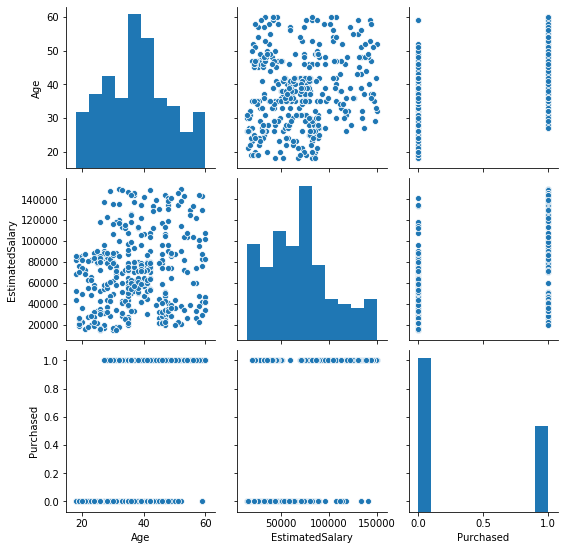

In [113]:
sns.pairplot(cb_data)

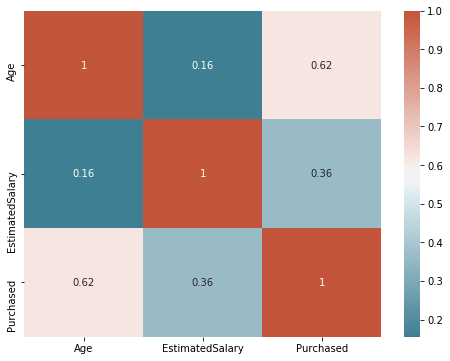

In [114]:
corr = cb_data.corr()# plot the heatmap
plt.subplots(figsize=(8,6))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [9]:
cb_data.replace({"Gender":{'Male':1,'Female':0}},inplace=True)

In [10]:
class NaiveBayesClassifier():
    def calc_prior(self, features, target):
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy


In [11]:
X_cb, y_cb = cb_data.iloc[:, :-1], cb_data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_cb,y_cb,test_size=0.6)

In [12]:
x = NaiveBayesClassifier()
x.fit(X_train, y_train)

In [13]:
predictions = x.predict(X_test)

In [14]:
x.accuracy(y_test, predictions)

0.8083333333333333

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8625


In [17]:
iris_data = pd.read_csv('Iris.csv')
iris_data.replace({"Species":{'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}},inplace=True)

In [26]:
X_iris, y_iris = iris_data.iloc[:, :-1], iris_data.iloc[:, -1]
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris,y_iris,test_size=0.6)

In [27]:
x = NaiveBayesClassifier()
x.fit(X_train_iris, y_train_iris)

In [28]:
predictions = x.predict(X_test_iris)

In [29]:
x.accuracy(y_test_iris, predictions)

1.0

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
gnb = GaussianNB()
gnb.fit(X_train_iris, y_train_iris)
y_pred = gnb.predict(X_test_iris)
print("Accuracy:",metrics.accuracy_score(y_test_iris, y_pred))

Accuracy: 1.0


In [31]:
# df = pd.read_csv("Iris.csv")

# df = df.sample(frac=1, random_state=1).reset_index(drop=True)
# X, y = df.iloc[:, :-1], df.iloc[:, -1]

# X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]

In [32]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, Y_pred))

Accuracy: 0.6166666666666667
